In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
import tqdm
import os
import sys

utils_path = os.path.abspath(r"C:\Users\eriki\OneDrive\Documents\all_folder\Thesis\Thesis")
if utils_path not in sys.path:
    sys.path.append(utils_path)
from utils.utils import *

## Defining the images and iteration values:

In [3]:
im_size_values = [int(x) for x in np.linspace(start=10, stop=50, num=5)]
SNR_values = np.logspace(start=3, stop=-2, num=31)

In [4]:
im_size_values

[10, 20, 30, 40, 50]

In [5]:
im_size = 50
SNR = SNR_values[0]
im1 = np.zeros((im_size, im_size))
im1[int(0.1 * im_size): int(0.3 * im_size), int(0.1 * im_size): int(0.3 * im_size)] = 1  # defining what the value in each of the non-zero pixels will be
im2 = np.zeros((im_size, im_size))
im2[int(0.7 * im_size): int(0.9 * im_size), int(0.7 * im_size): int(0.9 * im_size)] = 1 # defining what the value in each of the non-zero pixels will be

(-0.5, 49.5, 49.5, -0.5)

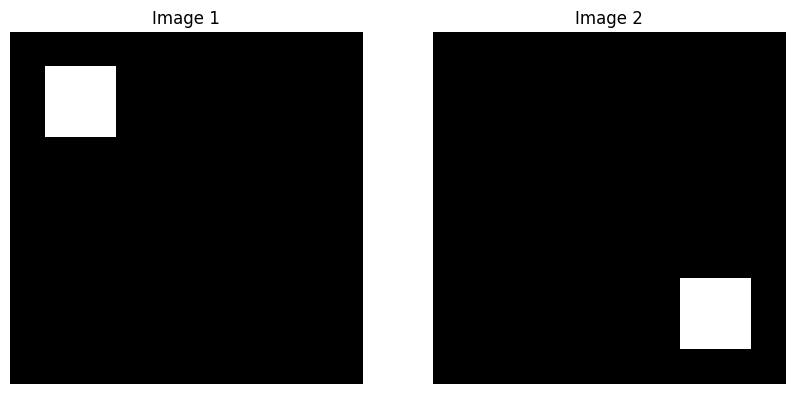

In [7]:
# Create a figure to hold the subplots
plt.figure(figsize=(10, 5))

# Display im1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(im1, cmap='gray')
plt.title('Image 1')
plt.axis('off')  # Hide the axis

# Display im2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(im2, cmap='gray')
plt.title('Image 2')
plt.axis('off')  # Hide the axis

#plt.savefig('images/images.png')

## Make sure that the different metrics are indeed different

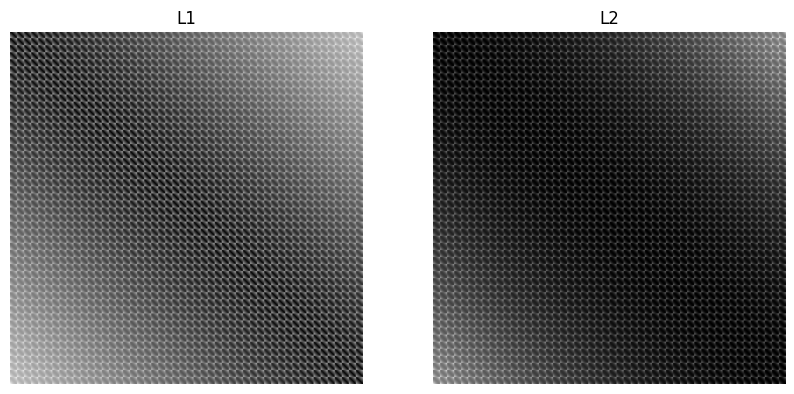

In [8]:
cost_matrix_l1 = calculate_costs(im1.shape, 'L1')
cost_matrix_l2 = calculate_costs(im1.shape, 'L2')
# Create a figure to hold the subplots
plt.figure(figsize=(10, 5))

# Display im1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
cost_matrix_l1 = calculate_costs(im1.shape, 'L1')
plt.imshow(cost_matrix_l1, cmap='gray')
plt.title('L1')
plt.axis('off')  # Hide the axis

# Display im2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
cost_matrix_l2 = calculate_costs(im1.shape, 'L2')
plt.imshow(cost_matrix_l2, cmap='gray')
plt.title('L2')
plt.axis('off')  # Hide the axis

plt.show()

[3 4 4 ... 4 4 3]


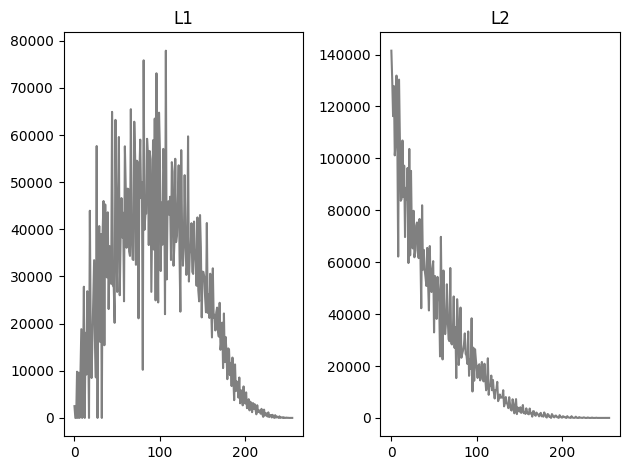

In [9]:
print(sum(cost_matrix_l1 == cost_matrix_l2))
cost_matrix_l1.shape

# Calculate the histogram
hist_l1, bins_im1 = np.histogram(cost_matrix_l1.flatten(), bins=256, range=[np.min(cost_matrix_l1), np.max(cost_matrix_l1)])
hist_l2, bins_im2 = np.histogram(cost_matrix_l2.flatten(), bins=256, range=[np.min(cost_matrix_l2), np.max(cost_matrix_l2)])

# Display im1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(hist_l1, color='gray')
plt.title('L1')
# plt.axis('off')  # Hide the axis

# Display im2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(hist_l2, color='gray')
plt.title('L2')


plt.tight_layout()
plt.show()

## L1 distance matrix

### If I want to read existing results:

In [11]:
df_im_l1 = pd.read_csv('../csvs/images_l1_metric.csv')
save_value = False

### If I want to calculate new results:

In [ ]:
df_im_l1 = pd.DataFrame()

for im_size in tqdm.tqdm(im_size_values):
    for SNR in SNR_values:
        im1 = np.zeros((im_size, im_size))
        im1[int(0.1 * im_size): int(0.3 * im_size), int(0.1 * im_size): int(0.3 * im_size)] = 1  # defining what the value in each of the non-zero pixels will be
        im2 = np.zeros((im_size, im_size))
        im2[int(0.7 * im_size): int(0.9 * im_size), int(0.7 * im_size): int(0.9 * im_size)] = 1 # defining what the value in each of the non-zero pixels will be
        
        df_im_l1 = run_experiment_and_append_images(df=df_im_l1, im1=im1, im2=im2, SNR=SNR, distance_metric='L2', n_samples=30)

#### If I want to save:

In [56]:
#save_value = True
if save_value:
    df_im_l1.to_csv('csvs/images_l1_metric.csv', index=False)

### Plotting:

In [17]:
print(len(df_im_l1['Im_Size'].unique()))
print(len(df_im_l1['SNR'].unique()))
print(len(df_im_l1.index))

5
31
155


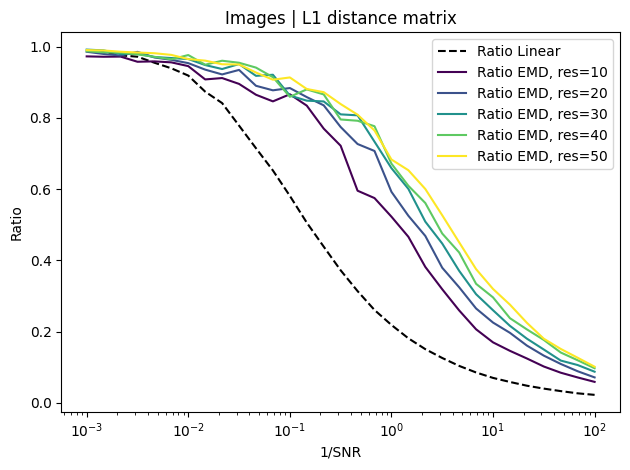

In [18]:
subset = df_im_l1[df_im_l1['Im_Size'] == im_size_values[1]]
plt.plot(1/subset['SNR'], subset['Ratios_Linear'], label='Ratio Linear', color='black', linestyle='--')

colors = plt.cm.viridis(np.linspace(0, 1, len(im_size_values)))  # Generate colors for each 'res' value

for i, res_option in enumerate(im_size_values):
    # Filter the dataframe based on current 'res' option
    filtered_df = df_im_l1[df_im_l1['Im_Size'] == res_option]
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label=f'Ratio EMD, res={res_option}', color=colors[i])

plt.xscale('log')
plt.title('Images | L1 distance matrix')
plt.xlabel('1/SNR')
plt.ylabel('Ratio')
plt.legend()

plt.tight_layout()
plt.show()
#plt.savefig('images/comparison/images_l1')

In [19]:
#SNR Values
print(df_im_l1['SNR'].unique())

[1.00000000e+03 6.81292069e+02 4.64158883e+02 3.16227766e+02
 2.15443469e+02 1.46779927e+02 1.00000000e+02 6.81292069e+01
 4.64158883e+01 3.16227766e+01 2.15443469e+01 1.46779927e+01
 1.00000000e+01 6.81292069e+00 4.64158883e+00 3.16227766e+00
 2.15443469e+00 1.46779927e+00 1.00000000e+00 6.81292069e-01
 4.64158883e-01 3.16227766e-01 2.15443469e-01 1.46779927e-01
 1.00000000e-01 6.81292069e-02 4.64158883e-02 3.16227766e-02
 2.15443469e-02 1.46779927e-02 1.00000000e-02]


In [22]:
df_im_l1.head()

,SNR,Noise_Param,Im_Size,Distances_Classic,Distances_Noised,CI_Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,CI_Distances_Linear_Noised,Ratios_Linear
0,1000.000000,0.020000,10.0,33.941125,34.911830,0.267889,0.972554,2.828427,2.850778,0.011986,0.992270
1,681.292069,0.024231,10.0,33.941125,34.953592,0.328701,0.971565,2.828427,2.856430,0.012756,0.990320
2,464.158883,0.029356,10.0,33.941125,34.937875,0.325647,0.971997,2.828427,2.861060,0.014165,0.988746
3,316.227766,0.035566,10.0,33.941125,35.487502,0.465505,0.957480,2.828427,2.889350,0.014482,0.979069
4,215.443469,0.043089,10.0,33.941125,35.475007,0.600962,0.958529,2.828427,2.875546,0.023098,0.984010


In [27]:
new_subset = df_im_l1[(df_im_l1['Im_Size'] == 30)]

In [28]:
new_subset.head()

,SNR,Noise_Param,Im_Size,Distances_Classic,Distances_Noised,CI_Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,CI_Distances_Linear_Noised,Ratios_Linear
62,1000.000000,0.034641,30.0,916.410388,924.303393,4.658056,0.991619,8.485281,8.596986,0.020119,0.987041
63,681.292069,0.041969,30.0,916.410388,926.473658,5.581787,0.989362,8.485281,8.665597,0.017838,0.979218
64,464.158883,0.050846,30.0,916.410388,935.948132,6.016370,0.979378,8.485281,8.741448,0.030709,0.970770
65,316.227766,0.061601,30.0,916.410388,935.456732,7.369713,0.980019,8.485281,8.880003,0.035870,0.955647
66,215.443469,0.074632,30.0,916.410388,944.697924,10.146053,0.970751,8.485281,9.024557,0.040354,0.940362


## L2 Distance matrix

### If I want to read existing results:

In [60]:
df_im_l2 = pd.read_csv('csvs/images_l2_metric.csv')
save_value = False

### If I want to calculate new results:

In [ ]:
df_im_l2 = pd.DataFrame()

for im_size in tqdm.tqdm(im_size_values):
    for SNR in SNR_values:
        im1 = np.zeros((im_size, im_size))
        im1[int(0.1 * im_size): int(0.3 * im_size), int(0.1 * im_size): int(0.3 * im_size)] = 1  # defining what the value in each of the non-zero pixels will be
        im2 = np.zeros((im_size, im_size))
        im2[int(0.7 * im_size): int(0.9 * im_size), int(0.7 * im_size): int(0.9 * im_size)] = 1 # defining what the value in each of the non-zero pixels will be
        
        df_im_l2 = run_experiment_and_append_images(df=df_im_l2, im1=im1, im2=im2, SNR=SNR, distance_metric='L2', n_samples=30)

#### Save the new dataframe:

In [ ]:
#save_value = True
if save_value:
    df_im_l1.to_csv('csvs/images_l2_metric.csv', index=False)

### Plotting

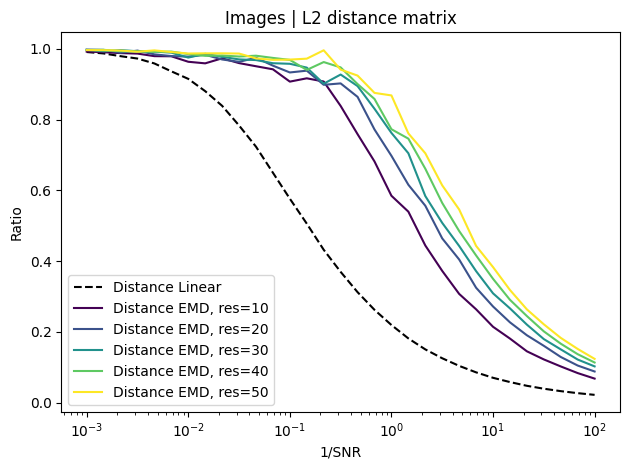

In [65]:
subset = df_im_l2[df_im_l2['Im_Size'] == im_size_values[1]]
plt.plot(1/subset['SNR'], subset['Ratios_Linear'], label='Distance Linear', color='black', linestyle='--')

colors = plt.cm.viridis(np.linspace(0, 1, len(im_size_values)))  # Generate colors for each 'res' value

for i, res_option in enumerate(im_size_values):
    # Filter the dataframe based on current 'res' option
    filtered_df = df_im_l2[df_im_l2['Im_Size'] == res_option]
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label=f'Distance EMD, res={res_option}', color=colors[i])

plt.xscale('log')
plt.title('Images | L2 distance matrix')
plt.xlabel('1/SNR')
plt.ylabel('Ratio')
plt.legend()

plt.tight_layout()
plt.savefig('images/comparison/images_l2')